In [0]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
os.chdir('/content/drive/My Drive/ML Health Care/Project 1')

In [0]:
from VAE_arch import VAE

Using TensorFlow backend.


In [0]:
df_train = pd.read_csv("data/mitbih_train.csv", header=None)
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("data/mitbih_test.csv", header=None)

Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

In [0]:
print(X.shape, X_test.shape)
print(Y.shape, Y_test.shape)

(87554, 187, 1) (21892, 187, 1)
(87554,) (21892,)


In [0]:
X_all = np.vstack((X, X_test))
Y_all = np.hstack((Y, Y_test))

In [0]:
X_0 = []
X_1 = []
X_2 = []
X_3 = []
X_4 = []
X_classes = [X_0,X_1,X_2,X_3,X_4]

for i in range(len(Y_all)):
  X_classes[Y_all[i]].append(X_all[i])

X_0 = np.asarray(X_0)
X_1 = np.asarray(X_1)
X_2 = np.asarray(X_2)
X_3 = np.asarray(X_3)
X_4 = np.asarray(X_4)

In [0]:
X_resampled = np.vstack([X_0,\
                         X_1[np.random.randint(0, len(X_1), len(X_0))],\
                         X_2[np.random.randint(0, len(X_2), len(X_0))],\
                         X_3[np.random.randint(0, len(X_3), len(X_0))],\
                         X_4[np.random.randint(0, len(X_4), len(X_0))]])
Y_resampled = np.hstack([np.zeros(len(X_0)),\
                         np.zeros(len(X_0))+1,\
                         np.zeros(len(X_0))+2,\
                         np.zeros(len(X_0))+3,\
                         np.zeros(len(X_0))+4]).astype(int)

In [0]:
Y_resampled_one_hot = np.zeros((Y_resampled.size, 5))
Y_resampled_one_hot[np.arange(Y_resampled.size), Y_resampled] = 1

In [0]:
vae = VAE((187, 1), 8)

In [14]:
vae.train([X_resampled, Y_resampled_one_hot], X_resampled, "VAE_8")

Epoch 1/10
452945/452945 [==============================] - 52s 115us/step - loss: 0.0063
Epoch 2/10
452945/452945 [==============================] - 51s 112us/step - loss: 0.0029
Epoch 3/10
452945/452945 [==============================] - 50s 111us/step - loss: 0.0023
Epoch 4/10
452945/452945 [==============================] - 50s 111us/step - loss: 0.0021
Epoch 5/10
452945/452945 [==============================] - 50s 110us/step - loss: 0.0019
Epoch 6/10
452945/452945 [==============================] - 50s 110us/step - loss: 0.0018
Epoch 7/10
452945/452945 [==============================] - 50s 111us/step - loss: 0.0017
Epoch 8/10
452945/452945 [==============================] - 50s 110us/step - loss: 0.0016
Epoch 9/10
452945/452945 [==============================] - 50s 110us/step - loss: 0.0016
Epoch 10/10
452945/452945 [==============================] - 50s 110us/step - loss: 0.0015


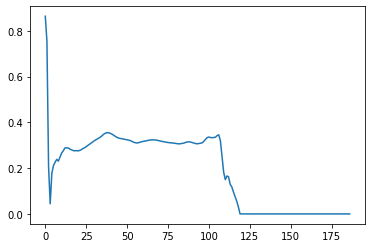

In [19]:
plt.plot(vae.decoder.predict(np.asarray([0.1,-0.1,0.4,0,0,0,0,0,0,1,0,0,0]).reshape(1,-1)).reshape(-1))

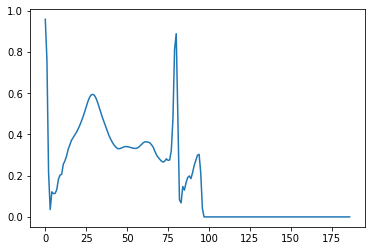

In [24]:
import matplotlib.pyplot as plt
i = 41000
plt.plot(vae.model.predict([X_resampled[i].reshape(1,-1,1), Y_resampled_one_hot[i].reshape(1,-1)]).reshape(-1))

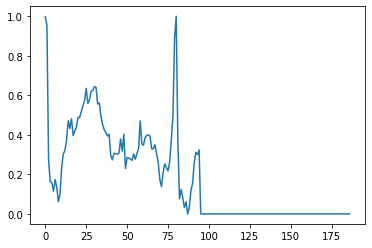

In [25]:
plt.plot(X_resampled[i])

In [0]:
vae = VAE((187, 1), 4)

In [0]:
vae.set_weights('vae/VAE_4/VAE_4_weights.h5')

In [0]:
Z_DIM = 4
noise = np.random.normal(0, 1, (20000, Z_DIM))
classes = np.zeros((20000, 5)) + np.asarray([1,0,0,0,0])
X_generated = vae.decoder.predict(np.hstack([noise, classes]).reshape(-1,Z_DIM+5))
Y_generated = classes

noise = np.random.normal(0, 1, (20000, Z_DIM))
classes = np.zeros((20000, 5)) + np.asarray([0,1,0,0,0])
X_generated = np.vstack([X_generated, vae.decoder.predict(np.hstack([noise, classes]).reshape(-1,Z_DIM+5))])
Y_generated = np.vstack([Y_generated, classes])

noise = np.random.normal(0, 1, (20000, Z_DIM))
classes = np.zeros((20000, 5)) + np.asarray([0,0,1,0,0])
X_generated = np.vstack([X_generated, vae.decoder.predict(np.hstack([noise, classes]).reshape(-1,Z_DIM+5))])
Y_generated = np.vstack([Y_generated, classes])

noise = np.random.normal(0, 1, (20000, Z_DIM))
classes = np.zeros((20000, 5)) + np.asarray([0,0,0,1,0])
X_generated = np.vstack([X_generated, vae.decoder.predict(np.hstack([noise, classes]).reshape(-1,Z_DIM+5))])
Y_generated = np.vstack([Y_generated, classes])

noise = np.random.normal(0, 1, (20000, Z_DIM))
classes = np.zeros((20000, 5)) + np.asarray([0,0,0,0,1])
X_generated = np.vstack([X_generated, vae.decoder.predict(np.hstack([noise, classes]).reshape(-1,Z_DIM+5))])
Y_generated = np.vstack([Y_generated, classes])

In [32]:
print(X_generated.shape, Y_generated.shape)

(100000, 187, 1) (100000, 5)


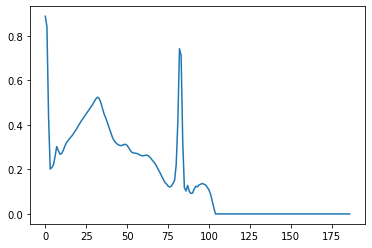

In [33]:
plt.plot(X_generated[2])

In [0]:
np.savetxt("data/X_generated_4.csv", X_generated.reshape(-1,187), delimiter=",")
np.savetxt("data/Y_generated_4.csv", Y_generated, delimiter=",")